In [1]:
# Import packages and implement notebook settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy
sns.set_theme(style="darkgrid")

pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)

%matplotlib inline 



# Model Comparison - Base Models' Cross Validation 


In [2]:
import os

current_directory = os.getcwd()

dataframes = ['lm_results.csv', 'ridge_results.csv', 'lasso_results.csv',
              'rf_results.csv', 'gbmr_results.csv', 'xgboost_results.csv',
              'lm_train_test_score.csv', 'ridge_train_test_score.csv', 'lasso_train_test_score.csv',
              'rf_train_test_score.csv', 'gbmr_train_test_score.csv', 'xgb_train_test_score.csv'
             ]

loaded_dataframes = {}

for file_name in dataframes:
    
    df_name = file_name.split('.csv')[0]
    file_path = os.path.join(current_directory, file_name)
    loaded_dataframes[df_name] = pd.read_csv(file_path, sep='\t')



In [3]:
lm_results = loaded_dataframes['lm_results']
ridge_results = loaded_dataframes['ridge_results']
lasso_results = loaded_dataframes['lasso_results']
rf_results = loaded_dataframes['rf_results']
gbmr_results = loaded_dataframes['gbmr_results']
xgboost_results = loaded_dataframes['xgboost_results']

lm_train_test_score = loaded_dataframes['lm_train_test_score']
ridge_train_test_score = loaded_dataframes['ridge_train_test_score']
lasso_train_test_score = loaded_dataframes['lasso_train_test_score']
rf_train_test_score = loaded_dataframes['rf_train_test_score']
gbmr_train_test_score = loaded_dataframes['gbmr_train_test_score']
xgboost_train_test_score = loaded_dataframes['xgb_train_test_score']


In [4]:
models_train_test_score = pd.concat([lm_train_test_score,
          ridge_train_test_score,
          lasso_train_test_score,
          rf_train_test_score,
          gbmr_train_test_score,
          xgboost_train_test_score])
models_train_test_score["Scores' Percent Difference"] = models_train_test_score['Test Score'] / models_train_test_score['Train Score'] * 100
models_train_test_score['Regressor'] = models_train_test_score['Model'].apply(lambda x: x.split('_')[0])
models_train_test_score['Model Group'] = np.where(models_train_test_score['Regressor'].str.contains('Regression'), 'Linear Regression', 'Tree-Based Model')
models_train_test_score['Tuned'] = np.where(models_train_test_score['Model'].str.contains('Tuned'), 'Yes', 'No')


In [5]:
models_train_test_score.loc[models_train_test_score['Tuned'] == 'Yes', :].sort_values(by = 'Test Score', ascending = False)

,Model,Train Score,Test Score,Scores' Percent Difference,Regressor,Model Group,Tuned
3,Lasso Penalized Regression_NoDrop_Scaled_Tuned,0.939755,0.930681,99.034348,Lasso Penalized Regression,Linear Regression,Yes
1,Lasso Penalized Regression_Drop_Scaled_Tuned,0.942510,0.929450,98.614296,Lasso Penalized Regression,Linear Regression,Yes
1,Ridge Penalized Regression_Drop_Scaled_Tuned,0.941292,0.922772,98.032445,Ridge Penalized Regression,Linear Regression,Yes
1,Gradient Boosting_Drop_Tuned,0.957973,0.921063,96.147129,Gradient Boosting,Tree-Based Model,Yes
3,XGBoost_Encoded_Tuned,0.968102,0.921006,95.135165,XGBoost,Tree-Based Model,Yes
3,Ridge Penalized Regression_NoDrop_Scaled_Tuned,0.942031,0.920521,97.716592,Ridge Penalized Regression,Linear Regression,Yes
1,XGBoost_Drop_Tuned,0.968274,0.920246,95.039900,XGBoost,Tree-Based Model,Yes
3,Gradient Boosting_Encoded_Tuned,0.957662,0.917064,95.760728,Gradient Boosting,Tree-Based Model,Yes
3,Random Forest_Encoded_Tuned,0.983786,0.893312,90.803474,Random Forest,Tree-Based Model,Yes
1,Random Forest_Drop_Tuned,0.980299,0.868656,88.611282,Random Forest,Tree-Based Model,Yes


In [6]:
models_train_test_score_melt = models_train_test_score.melt(id_vars = ['Model', 'Regressor', 'Model Group','Tuned',"Scores' Percent Difference"],
                            value_vars = ['Train Score', 'Test Score'],
                            var_name = 'Score Type',
                            value_name = 'Score')


In [7]:
models_train_test_score_melt 

,Model,Regressor,Model Group,Tuned,Scores' Percent Difference,Score Type,Score
0,Mulitple Linear Regression_Drop,Mulitple Linear Regression,Linear Regression,No,97.590591,Train Score,0.946416
1,Ridge Penalized Regression_Drop_Scaled,Ridge Penalized Regression,Linear Regression,No,97.677577,Train Score,0.946399
2,Ridge Penalized Regression_Drop_Scaled_Tuned,Ridge Penalized Regression,Linear Regression,Yes,98.032445,Train Score,0.941292
3,Ridge Penalized Regression_NoDrop_Scaled,Ridge Penalized Regression,Linear Regression,No,97.653680,Train Score,0.946414
4,Ridge Penalized Regression_NoDrop_Scaled_Tuned,Ridge Penalized Regression,Linear Regression,Yes,97.716592,Train Score,0.942031
5,Lasso Penalized Regression_Drop_Scaled,Lasso Penalized Regression,Linear Regression,No,99.342147,Train Score,0.930099
6,Lasso Penalized Regression_Drop_Scaled_Tuned,Lasso Penalized Regression,Linear Regression,Yes,98.614296,Train Score,0.942510
7,Lasso Penalized Regression_NoDrop_Scaled,Lasso Penalized Regression,Linear Regression,No,99.344725,Train Score,0.933032
8,Lasso Penalized Regression_NoDrop_Scaled_Tuned,Lasso Penalized Regression,Linear Regression,Yes,99.034348,Train Score,0.939755
9,Random Forest_Drop,Random Forest,Tree-Based Model,No,91.925416,Train Score,0.985133


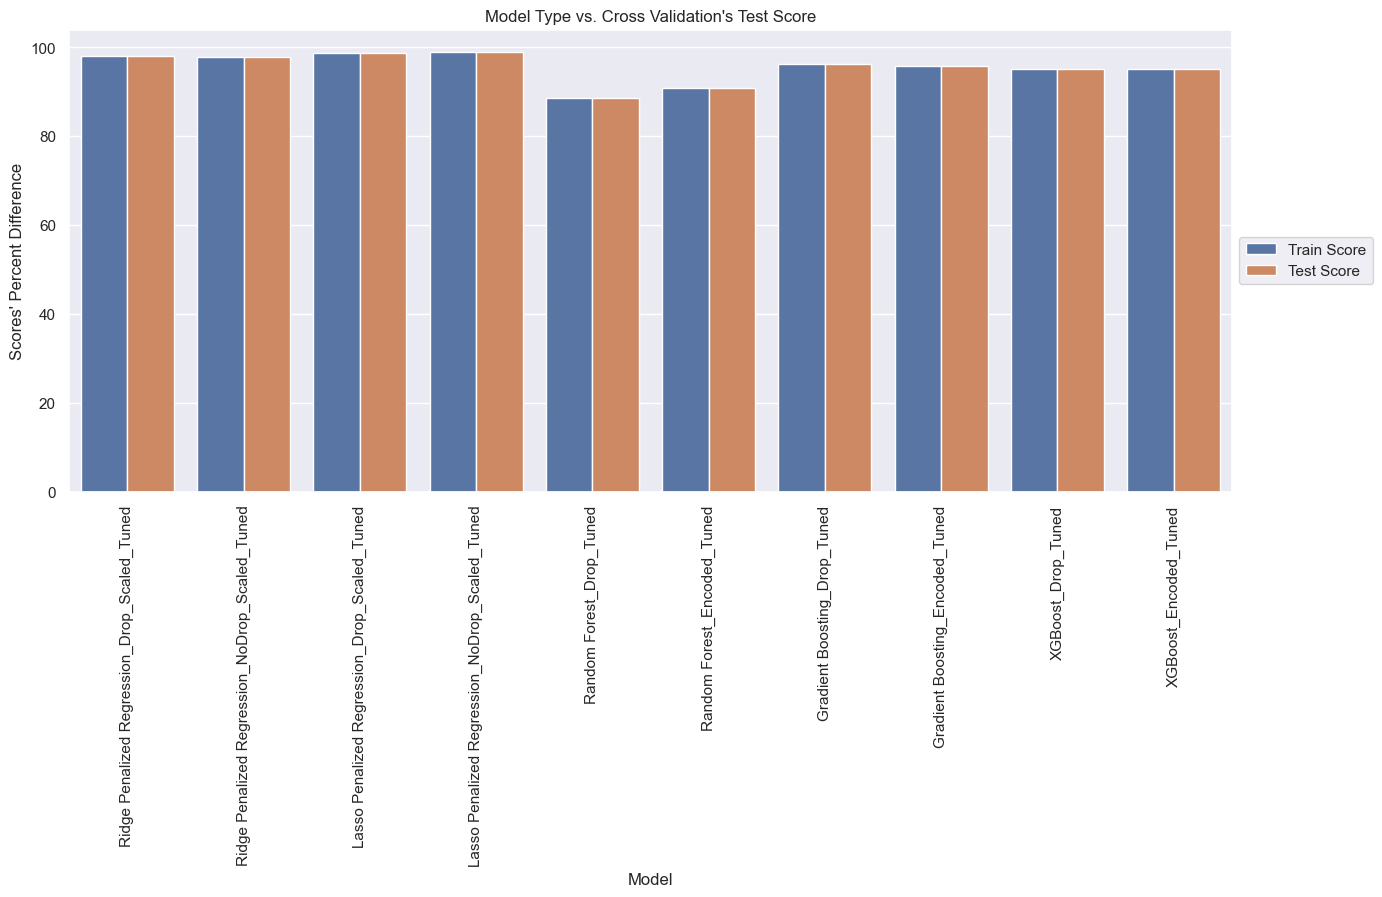

In [8]:


plot = sns.barplot(
    data = models_train_test_score_melt.loc[models_train_test_score_melt['Tuned'] == 'Yes', :],
    x = 'Model',
    y = "Scores' Percent Difference",
    hue = 'Score Type')

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("Model Type vs. Cross Validation's Test Score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.gcf().set_size_inches(15, 6)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


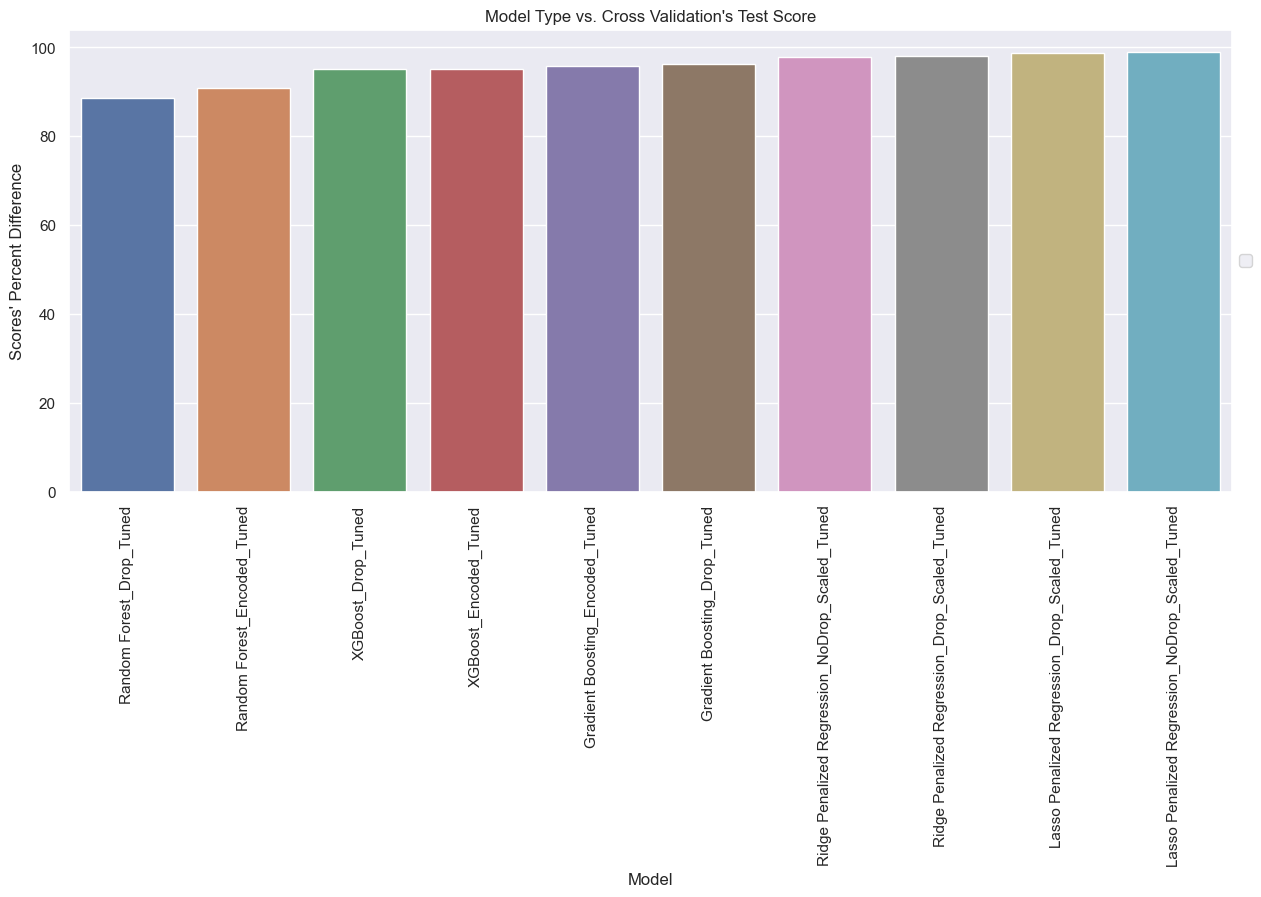

In [9]:
temp_df = models_train_test_score.loc[models_train_test_score['Tuned'] == 'Yes', ['Model', "Scores' Percent Difference"]]
sorted_categories = temp_df.groupby('Model')["Scores' Percent Difference"].mean().sort_values().index
temp_df['Model'] = pd.Categorical(temp_df['Model'], categories=sorted_categories, ordered=True)
temp_df_sorted = temp_df.sort_values(by='Model')


plot = sns.barplot(
    data = temp_df_sorted,
    x = 'Model',
    y = "Scores' Percent Difference"
)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("Model Type vs. Cross Validation's Test Score")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.gcf().set_size_inches(15, 6)

plt.show()


In [10]:
base_models_cv = pd.merge(lm_results, ridge_results, on='Model Number', how='outer')
base_models_cv = pd.merge(base_models_cv, lasso_results, on='Model Number', how='outer')
base_models_cv = pd.merge(base_models_cv, rf_results, on='Model Number', how='outer')
base_models_cv = pd.merge(base_models_cv, gbmr_results, on='Model Number', how='outer')
base_models_cv = pd.merge(base_models_cv, xgboost_results, on='Model Number', how='outer')


base_models_cv = base_models_cv.melt(id_vars = 'Model Number', value_vars = base_models_cv.drop(columns = 'Model Number').columns, var_name = 'Model Type', value_name = 'Test Score')
base_models_cv['Regressor'] = base_models_cv['Model Type'].apply(lambda x: x.split('_')[0])
base_models_cv['Model Group'] = np.where(base_models_cv['Regressor'].str.contains('Regression'), 'Linear Regression', 'Tree-Based Model')


In [11]:
base_models_cv

,Model Number,Model Type,Test Score,Regressor,Model Group
0,1.0,Mulitple Linear Regression_Drop,0.923613,Mulitple Linear Regression,Linear Regression
1,2.0,Mulitple Linear Regression_Drop,0.886358,Mulitple Linear Regression,Linear Regression
2,3.0,Mulitple Linear Regression_Drop,0.929390,Mulitple Linear Regression,Linear Regression
3,4.0,Mulitple Linear Regression_Drop,0.926848,Mulitple Linear Regression,Linear Regression
4,5.0,Mulitple Linear Regression_Drop,0.898709,Mulitple Linear Regression,Linear Regression
5,1.0,Ridge Penalized Regression_Drop_Scaled,0.924420,Ridge Penalized Regression,Linear Regression
6,2.0,Ridge Penalized Regression_Drop_Scaled,0.887339,Ridge Penalized Regression,Linear Regression
7,3.0,Ridge Penalized Regression_Drop_Scaled,0.930153,Ridge Penalized Regression,Linear Regression
8,4.0,Ridge Penalized Regression_Drop_Scaled,0.926810,Ridge Penalized Regression,Linear Regression
9,5.0,Ridge Penalized Regression_Drop_Scaled,0.898524,Ridge Penalized Regression,Linear Regression


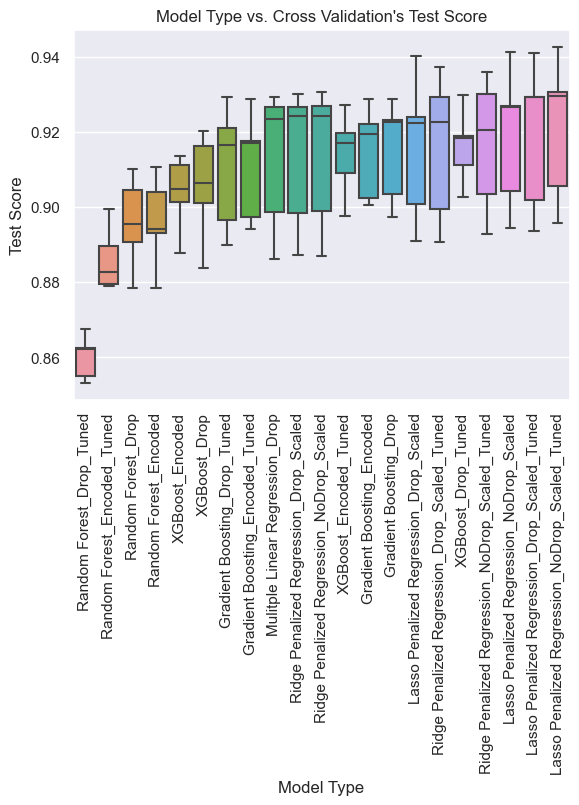

In [12]:
temp_df = base_models_cv.loc[:, ['Model Type','Test Score']]
sorted_categories = temp_df.groupby('Model Type')['Test Score'].mean().sort_values().index
temp_df['Model Type'] = pd.Categorical(temp_df['Model Type'], categories=sorted_categories, ordered=True)
temp_df_sorted = temp_df.sort_values(by='Model Type')
plot = sns.boxplot(temp_df_sorted, x = 'Model Type',  y = 'Test Score')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("Model Type vs. Cross Validation's Test Score")
plt.show()



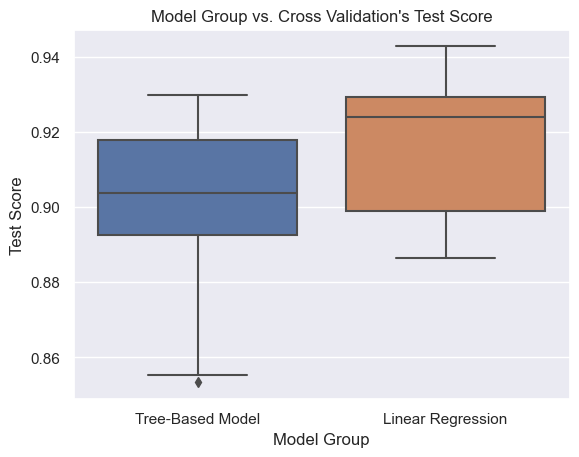

In [13]:
temp_df = base_models_cv.loc[:, ['Model Group','Test Score']]
sorted_categories = temp_df.groupby('Model Group')['Test Score'].mean().sort_values().index
temp_df['Model Group'] = pd.Categorical(temp_df['Model Group'], categories=sorted_categories, ordered=True)
temp_df_sorted = temp_df.sort_values(by='Model Group')
plot = sns.boxplot(temp_df_sorted, x = 'Model Group',  y = 'Test Score')
plt.title("Model Group vs. Cross Validation's Test Score")
plt.show()

In [14]:
base_models_cv_summary = base_models_cv.groupby('Model Type')['Test Score'].agg(['mean','std']).reset_index().sort_values(by = 'mean')
base_models_cv_summary['Regressor'] = base_models_cv_summary['Model Type'].apply(lambda x: x.split('_')[0])
base_models_cv_summary['Model Group'] = np.where(base_models_cv_summary['Regressor'].str.contains('Regression'), 'Linear Regression', 'Tree-Based Model')
base_models_cv_summary['Tuned'] = np.where(base_models_cv_summary['Model Type'].str.contains('Tuned'), 'Yes', 'No')

base_models_cv_summary

,Model Type,mean,std,Regressor,Model Group,Tuned
10,Random Forest_Drop_Tuned,0.860200,0.005906,Random Forest,Tree-Based Model,Yes
12,Random Forest_Encoded_Tuned,0.886154,0.008576,Random Forest,Tree-Based Model,Yes
9,Random Forest_Drop,0.895918,0.012357,Random Forest,Tree-Based Model,No
11,Random Forest_Encoded,0.896140,0.012252,Random Forest,Tree-Based Model,No
19,XGBoost_Encoded,0.903808,0.010254,XGBoost,Tree-Based Model,No
17,XGBoost_Drop,0.905600,0.014383,XGBoost,Tree-Based Model,No
1,Gradient Boosting_Drop_Tuned,0.910718,0.016738,Gradient Boosting,Tree-Based Model,Yes
3,Gradient Boosting_Encoded_Tuned,0.910988,0.014685,Gradient Boosting,Tree-Based Model,Yes
8,Mulitple Linear Regression_Drop,0.912984,0.019281,Mulitple Linear Regression,Linear Regression,No
13,Ridge Penalized Regression_Drop_Scaled,0.913449,0.019251,Ridge Penalized Regression,Linear Regression,No


Text(0.5, 1.0, "Base Models' Cross-Validation: Std vs. Mean")

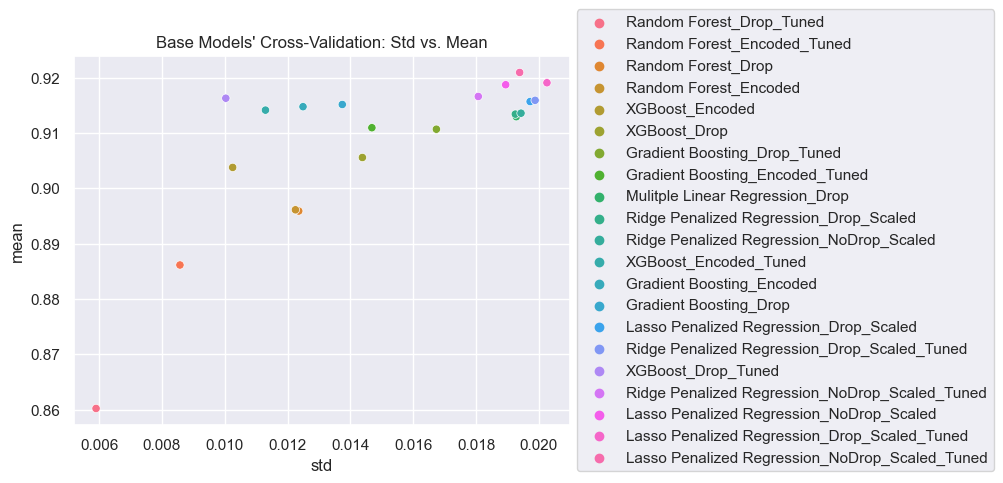

In [15]:
sns.scatterplot(base_models_cv_summary, x = 'std', y = 'mean', hue = 'Model Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Base Models' Cross-Validation: Std vs. Mean")


/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/881977493.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=90)


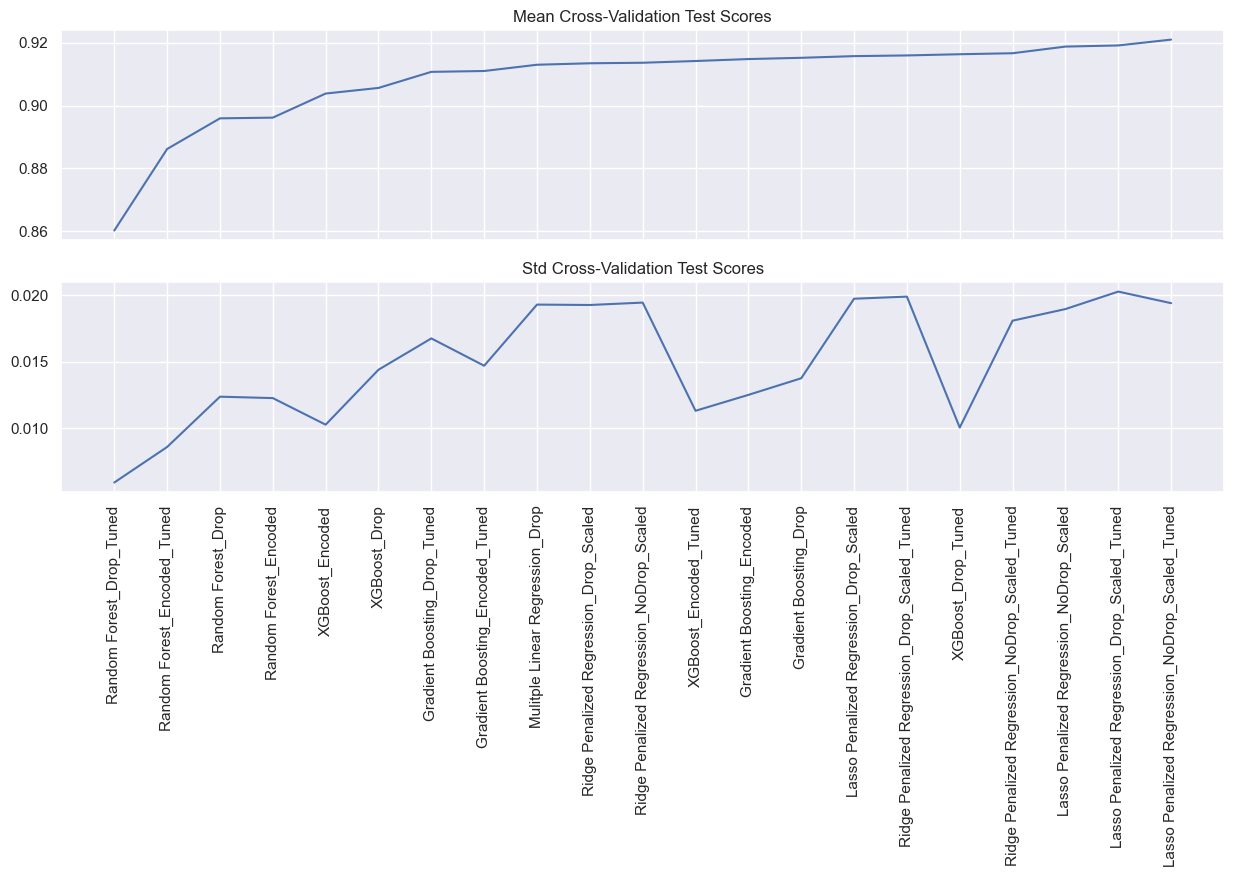

In [16]:

figure, axis = plt.subplots(2, 1) 
  
axis[0].plot(base_models_cv_summary['Model Type'], base_models_cv_summary['mean']) 
axis[0].set_title("Mean Cross-Validation Test Scores") 
axis[0].set_xticklabels([])

axis[1].plot(base_models_cv_summary['Model Type'], base_models_cv_summary['std']) 
axis[1].set_title("Std Cross-Validation Test Scores") 
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=90)

plt.gcf().set_size_inches(15, 6)

plt.show() 


/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/2126456921.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=90)


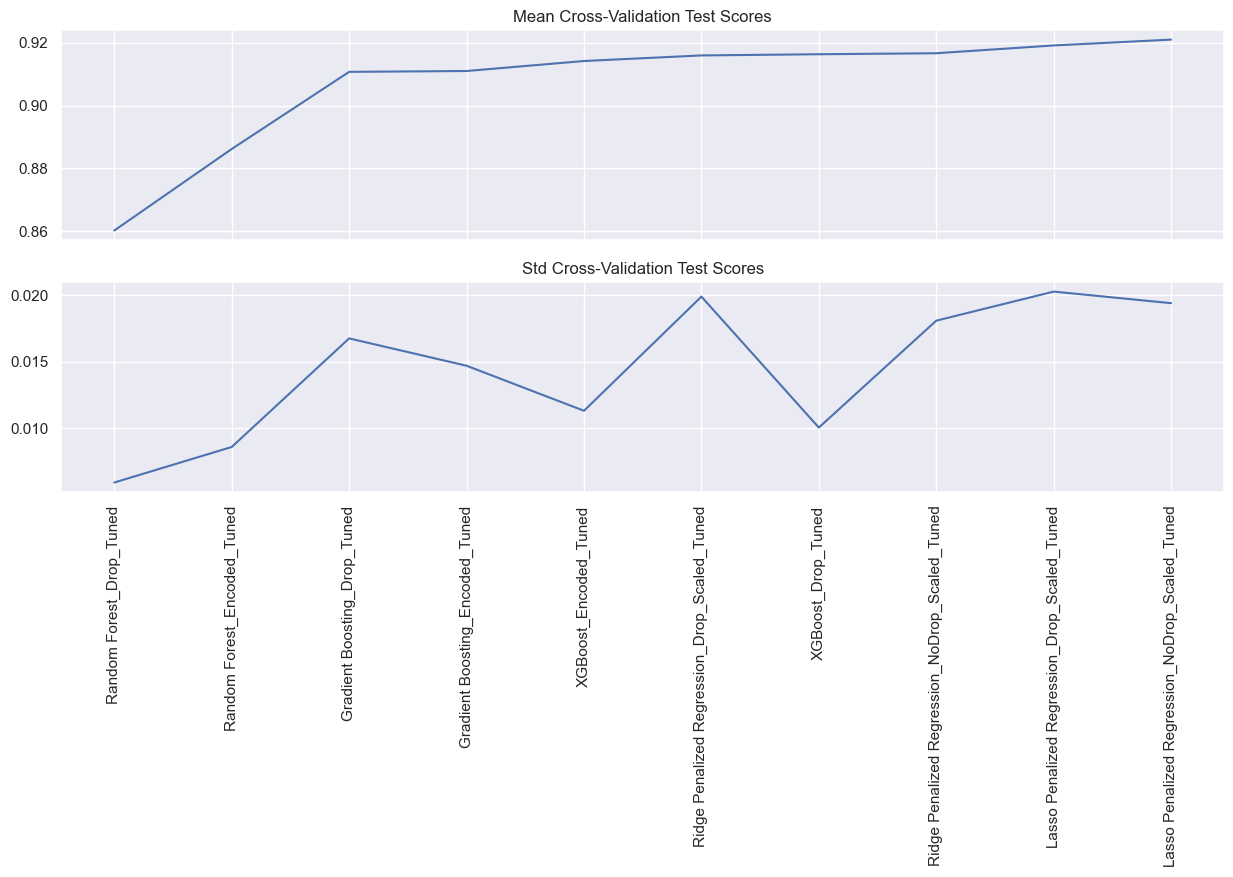

In [17]:

figure, axis = plt.subplots(2, 1) 
  
axis[0].plot(base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['Model Type'], base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['mean']) 
axis[0].set_title("Mean Cross-Validation Test Scores") 
axis[0].set_xticklabels([])

axis[1].plot(base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['Model Type'], base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['std']) 
axis[1].set_title("Std Cross-Validation Test Scores") 
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=90)

plt.gcf().set_size_inches(15, 6)

plt.show() 


/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/1537912314.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)
/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/1537912314.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)
/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/1537912314.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)
/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/1537912314.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)


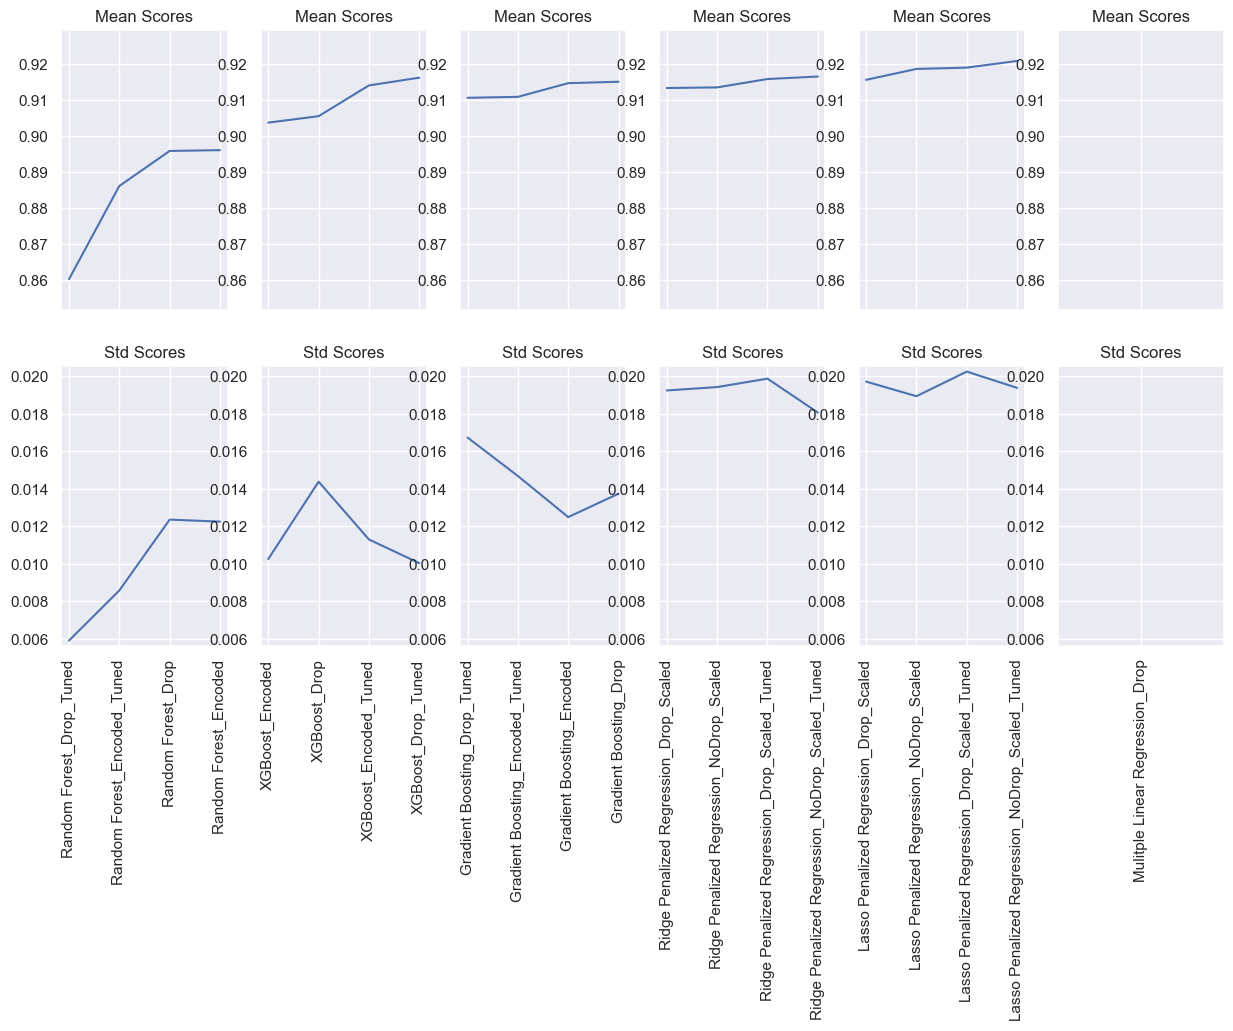

In [18]:

figure, axis = plt.subplots(2, base_models_cv_summary['Regressor'].nunique(), figsize=(15, 8)) 


for regressor_no in range(len(base_models_cv_summary['Regressor'].value_counts().index)):
    temp_df = base_models_cv_summary.loc[base_models_cv_summary['Regressor'] == base_models_cv_summary['Regressor'].value_counts().index[regressor_no], :]
    axis[0,regressor_no].plot(temp_df['Model Type'], temp_df['mean']) 
    axis[0,regressor_no].set_title("Mean Scores") 
    axis[0,regressor_no].set_xticklabels([])

    axis[1,regressor_no].plot(temp_df['Model Type'], temp_df['std']) 
    axis[1,regressor_no].set_title("Std Scores") 
    axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)
 

for row in range(len(axis)):
    for col in range(len(axis[row])):
        if axis[row][col].get_title() == 'Mean Scores':
            axis[row,col].set_ylim(base_models_cv_summary['mean'].min() - (base_models_cv_summary['mean'].min() * 0.01), base_models_cv_summary['mean'].max() + (base_models_cv_summary['mean'].min() * 0.01))  # Set same ylim for mean
        elif axis[row][col].get_title() == 'Std Scores':
            axis[row,col].set_ylim(base_models_cv_summary['std'].min() - (base_models_cv_summary['std'].min() * 0.05), base_models_cv_summary['std'].max() + (base_models_cv_summary['std'].min() * 0.05))    # Set same ylim for std

plt.show()

/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/2152024527.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)
/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/2152024527.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)


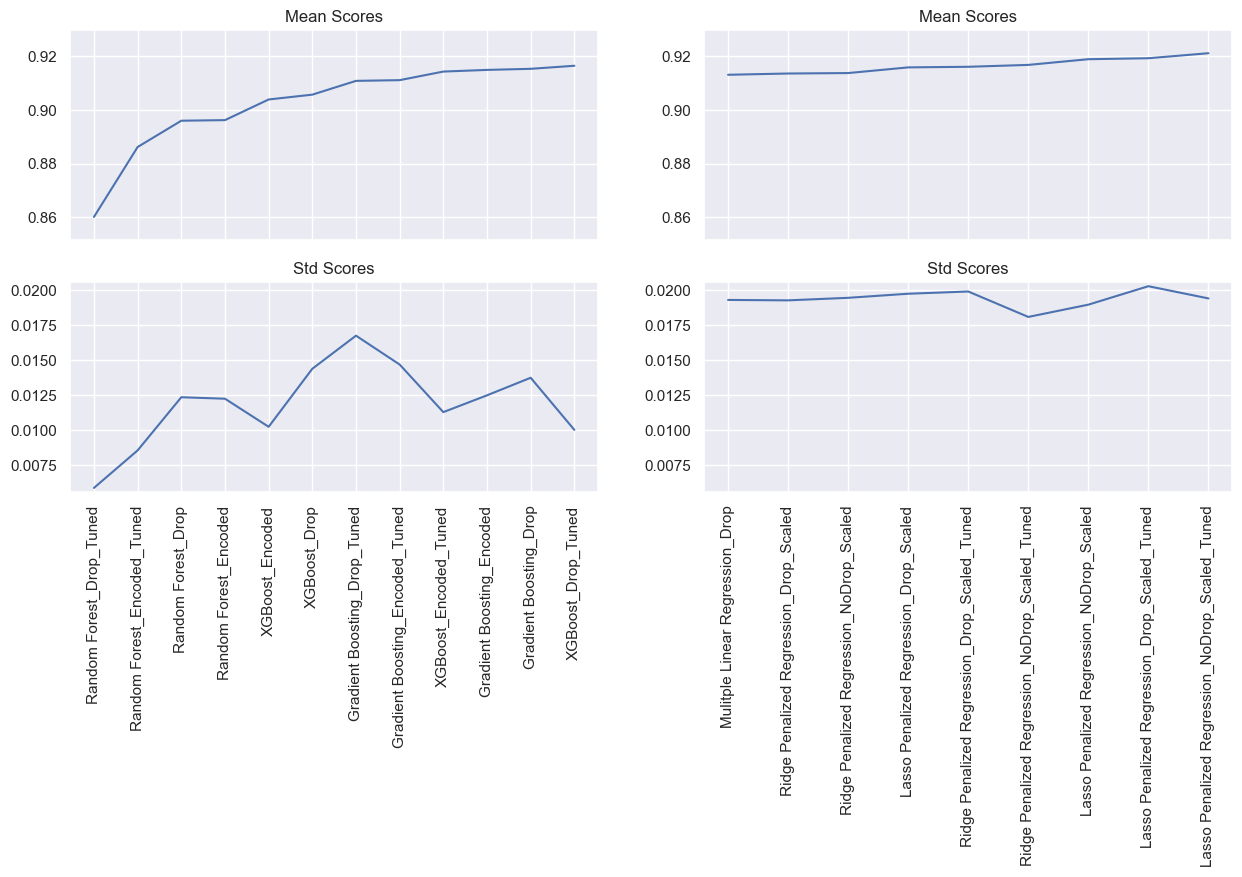

In [19]:

figure, axis = plt.subplots(2, base_models_cv_summary['Model Group'].nunique(), figsize=(15, 8)) 


for regressor_no in range(len(base_models_cv_summary['Model Group'].value_counts().index)):
    temp_df = base_models_cv_summary.loc[base_models_cv_summary['Model Group'] == base_models_cv_summary['Model Group'].value_counts().index[regressor_no], :]
    axis[0,regressor_no].plot(temp_df['Model Type'], temp_df['mean']) 
    axis[0,regressor_no].set_title("Mean Scores") 
    axis[0,regressor_no].set_xticklabels([])

    axis[1,regressor_no].plot(temp_df['Model Type'], temp_df['std']) 
    axis[1,regressor_no].set_title("Std Scores") 
    axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)
 

for row in range(len(axis)):
    for col in range(len(axis[row])):
        if axis[row][col].get_title() == 'Mean Scores':
            axis[row,col].set_ylim(base_models_cv_summary['mean'].min() - (base_models_cv_summary['mean'].min() * 0.01), base_models_cv_summary['mean'].max() + (base_models_cv_summary['mean'].min() * 0.01))  # Set same ylim for mean
        elif axis[row][col].get_title() == 'Std Scores':
            axis[row,col].set_ylim(base_models_cv_summary['std'].min() - (base_models_cv_summary['std'].min() * 0.05), base_models_cv_summary['std'].max() + (base_models_cv_summary['std'].min() * 0.05))    # Set same ylim for std

            
plt.gcf().set_size_inches(15, 6)
plt.show()

/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/552970712.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)
/var/folders/q4/qdx39_814xsc573q7tr8sbfh0000gn/T/ipykernel_67953/552970712.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)


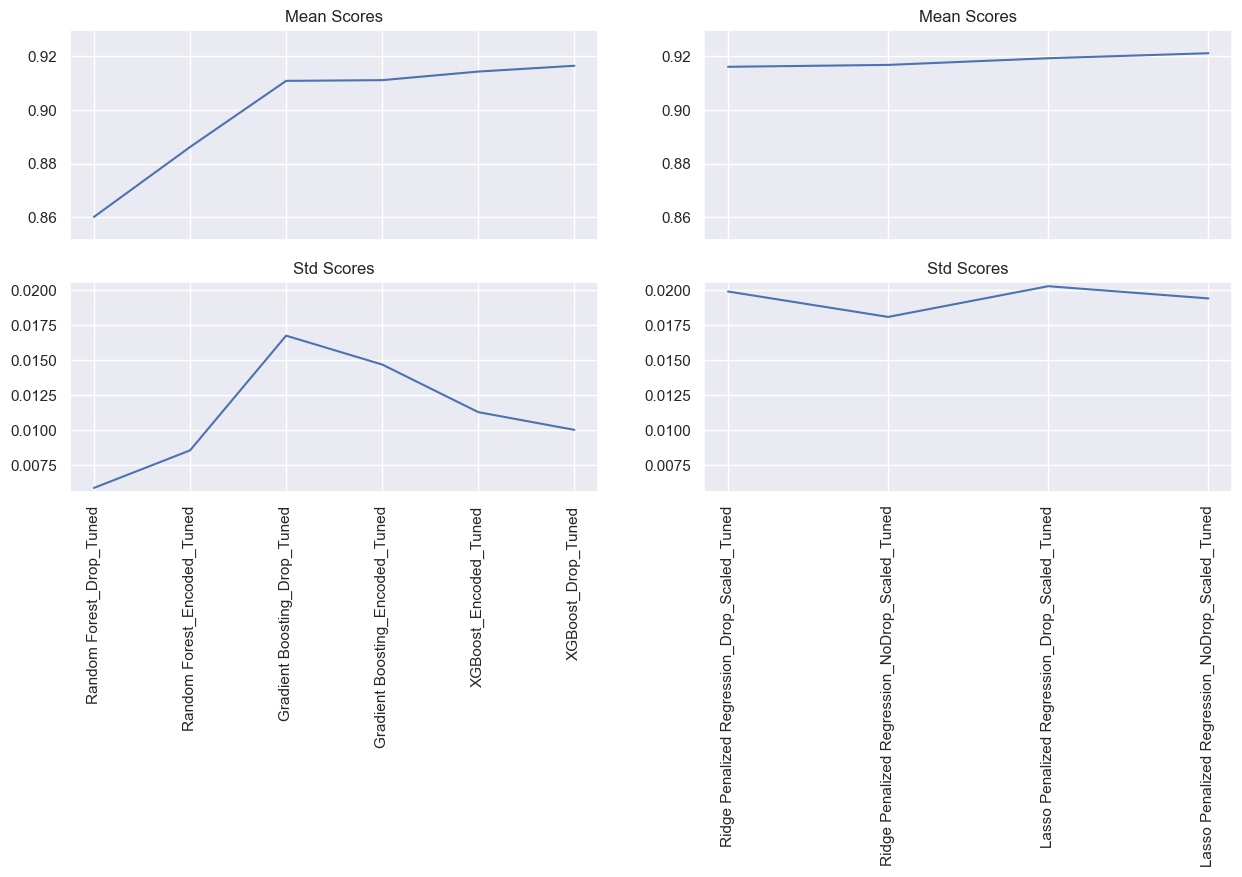

In [20]:

figure, axis = plt.subplots(2, base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['Model Group'].nunique(), figsize=(15, 8)) 


for regressor_no in range(len(base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['Model Group'].value_counts().index)):
    temp_df = base_models_cv_summary.loc[base_models_cv_summary['Model Group'] == base_models_cv_summary['Model Group'].value_counts().index[regressor_no], :]
    temp_df = temp_df.loc[temp_df['Tuned'] == 'Yes', :]
    axis[0,regressor_no].plot(temp_df['Model Type'], temp_df['mean']) 
    axis[0,regressor_no].set_title("Mean Scores") 
    axis[0,regressor_no].set_xticklabels([])

    axis[1,regressor_no].plot(temp_df['Model Type'], temp_df['std']) 
    axis[1,regressor_no].set_title("Std Scores") 
    axis[1,regressor_no].set_xticklabels(axis[1,regressor_no].get_xticklabels(), rotation=90)
 

for row in range(len(axis)):
    for col in range(len(axis[row])):
        if axis[row][col].get_title() == 'Mean Scores':
            axis[row,col].set_ylim(base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['mean'].min() - (base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['mean'].min() * 0.01), base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['mean'].max() + (base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['mean'].min() * 0.01))  # Set same ylim for mean
        elif axis[row][col].get_title() == 'Std Scores':
            axis[row,col].set_ylim(base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['std'].min() - (base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['std'].min() * 0.05), base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['std'].max() + (base_models_cv_summary.loc[base_models_cv_summary['Tuned'] == 'Yes', :]['std'].min() * 0.05))    # Set same ylim for std

            
plt.gcf().set_size_inches(15, 6)
plt.show()

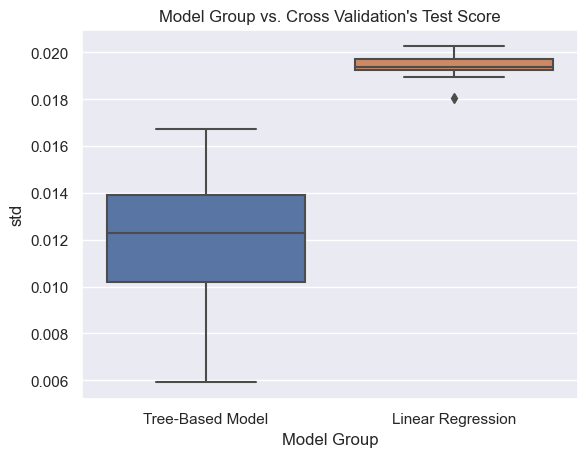

In [21]:

plot = sns.boxplot(base_models_cv_summary, x = 'Model Group',  y = 'std')
plt.title("Model Group vs. Cross Validation's Test Score")
plt.show()